<a href="https://colab.research.google.com/github/dewi31/Indonesia_Ecotourism_Recommendation/blob/main/Indonesia's_Ecotourism_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Indonesia's Ecotourism Recommendation - Dewi Wahidatul Karimah

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Data Loading**

In [ ]:
# Membaca/memuat file CSV
eco = pd.read_csv('/content/eco_place.csv')
eco.head()

,place_id,place_name,place_description,category,city,price,rating,description_location,place_img,gallery_photo_img1,gallery_photo_img2,gallery_photo_img3,place_map
0,1,Taman Nasional Gunung Leuser,Taman Nasional Gunung Leuser adalah salah satu...,"Budaya,Taman Nasional",Aceh,"Rp25,000",4.5,"Barisan mountain range, Aceh 24653",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Taman+Nasio...
1,2,Desa Wisata Munduk,Desa Wisata Munduk adalah sebuah desa di pegun...,Desa Wisata,Bali,"Rp10,000",4.5,"Munduk, Banjar, Kabupaten Buleleng, Bali",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://goo.gl/maps/LyeJ2mAeFGysTE9v9
2,3,Desa Wisata Penglipuran,Desa Wisata Penglipuran adalah sebuah desa wis...,"Budaya,Desa Wisata",Bali,"Rp25,000",4.8,"Jl. Penglipuran, Kubu, Kec. Bangli, Kabupaten ...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Desa+Wisata...
3,4,Taman Nasional Bali Barat,Taman Nasional Bali Barat adalah kawasan konse...,"Taman Nasional,Cagar Alam",Bali,"Rp15,000",4.5,"Sumber Klampok, Bali",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Taman+Nasio...
4,5,Bukit Jamur,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar Alam,Bandung,"Rp12,000",4.2,"Sugihmukti, Kec. Pasirjambu, Kabupaten Bandung...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Bukit+Jamur


##**Data Understanding**

In [ ]:
eco.shape

(182, 13)

In [ ]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   place_id              182 non-null    int64  
 1   place_name            182 non-null    object 
 2   place_description     182 non-null    object 
 3   category              182 non-null    object 
 4   city                  182 non-null    object 
 5   price                 182 non-null    object 
 6   rating                182 non-null    float64
 7   description_location  182 non-null    object 
 8   place_img             182 non-null    object 
 9   gallery_photo_img1    182 non-null    object 
 10  gallery_photo_img2    180 non-null    object 
 11  gallery_photo_img3    105 non-null    object 
 12  place_map             182 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 18.6+ KB


In [ ]:
# Menghitung data yang bernilai kosong(NAN, NaN, na)
eco.isna().sum()

place_id                 0
place_name               0
place_description        0
category                 0
city                     0
price                    0
rating                   0
description_location     0
place_img                0
gallery_photo_img1       0
gallery_photo_img2       2
gallery_photo_img3      77
place_map                0
dtype: int64

Pada gallery gallery_photo_img2 memiliki 2 data yang bernilai kosong dan gallery_photo_img3 memiliki 77 data yang bernilai kosong

In [ ]:
# Fitur Point of Contract dan Posted On tidak mempengaruhi harga sewa model sehingga akan didrop
eco = eco.drop(['place_description', 'description_location','place_img','gallery_photo_img1','gallery_photo_img2','gallery_photo_img3','place_map'], axis = 'columns')
eco.head()

,place_id,place_name,category,city,price,rating
0,1,Taman Nasional Gunung Leuser,"Budaya,Taman Nasional",Aceh,"Rp25,000",4.5
1,2,Desa Wisata Munduk,Desa Wisata,Bali,"Rp10,000",4.5
2,3,Desa Wisata Penglipuran,"Budaya,Desa Wisata",Bali,"Rp25,000",4.8
3,4,Taman Nasional Bali Barat,"Taman Nasional,Cagar Alam",Bali,"Rp15,000",4.5
4,5,Bukit Jamur,Cagar Alam,Bandung,"Rp12,000",4.2


**Univariate Analysis**

In [ ]:
# Mendapatkan deskriptif statistik dari data rating
eco[['rating']].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,rating
count,182.00
mean,4.42
std,0.22
min,3.40
25%,4.30
50%,4.40
75%,4.60
max,5.00


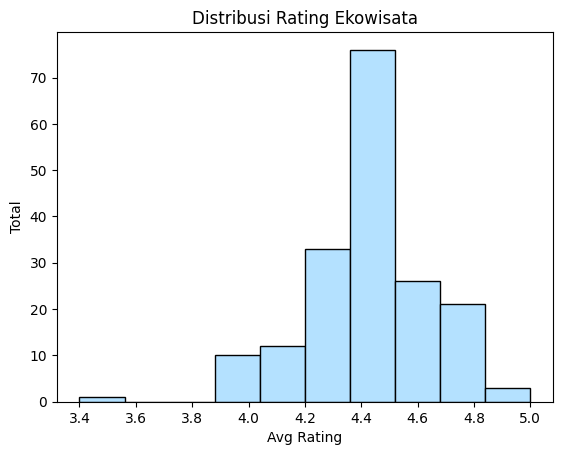

In [ ]:
# Distribusi rating ekowisata
plt.hist(eco.rating, color='#B4E1FF', edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Avg Rating')
plt.title("Distribusi Rating Ekowisata")
plt.show()

In [ ]:
# Mendapatkan jenis-jenis kategori ekowisata
eco.groupby('category')['category'].agg('count')

category
Bahari,Cagar Alam                                 29
Bahari,Cagar Alam,Taman Hiburan,Taman Nasional     1
Bahari,Taman Hiburan                               2
Bahari,Taman Hiburan,Taman Nasional                2
Budaya                                             6
Budaya,Cagar Alam                                 35
Budaya,Cagar Alam,Desa Wisata                      1
Budaya,Cagar Alam,Taman Nasional                   2
Budaya,Desa Wisata                                 2
Budaya,Taman Hiburan                               4
Budaya,Taman Nasional                              3
Cagar Alam                                        41
Cagar Alam,Desa Wisata                             2
Cagar Alam,Taman Hiburan                          12
Cagar Alam,Taman Nasional                         18
Desa Wisata                                        6
Desa Wisata,Taman Hiburan                          3
Taman Hiburan                                      7
Taman Nasional                       

Terdapat 6 kategori umum ekowisata diantaranya : Bahari,Cagar Alam,Taman Hiburan,Taman Nasional, Budaya, dan Desa Wisata

In [ ]:
# Mendapatkan jenis-jenis kategori ekowisata
eco.groupby('city')['city'].agg('count')

city
Aceh                 1
Bali                 3
Bandung             36
Banten               1
Bantul               1
Banyuwangi           1
Bogor                7
Boyolali             1
Denpasar             1
Ende                 1
Garut                1
Gunungkidul          1
Jakarta             12
Jambi                3
Jember               1
Jepara               1
Kalimantan Timur     1
Kapuas Hulu          1
Kotawaringin         1
Kubu Raya            1
Kulon Progo          2
Lampung              2
Lombok               2
Magelang             1
Malang               5
Manggarai            2
Pacitan              1
Padang               1
Palembang            1
Papua Barat          1
Pekanbaru            1
Pelalawan            1
Pesawaran            1
Pontianak            1
Purwakarta           1
Samarinda            1
Semarang            17
Situbondo            1
Sleman               1
Solok Selatan        1
Subang               1
Sukabumi             2
Sumatera Barat       1
Sumatr

## **Modelling Content Based Filtering**

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(eco['category'])
tf.get_feature_names_out()

array(['alam', 'bahari', 'budaya', 'cagar', 'desa', 'hiburan', 'nasional',
       'taman', 'wisata'], dtype=object)

In [ ]:
tfidf_matrix = tf.fit_transform(eco['category'])
tfidf_matrix.shape

(182, 9)

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.54344707, ..., 0.66397607, 0.51361568,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.70710678],
        [0.        , 0.        , 0.40916936, ..., 0.        , 0.        ,
         0.64520556],
        ...,
        [0.70710678, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.4336426 , 0.        , 0.78987859, ..., 0.        , 0.        ,
         0.        ],
        [0.70710678, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=eco.place_name
).sample(9, axis=1).sample(15, axis=0)

,budaya,desa,nasional,taman,bahari,cagar,alam,hiburan,wisata
place_name,,,,,,,,,
Pantai Nglambor,0.000000,0.0,0.00000,0.000000,0.838615,0.385178,0.385178,0.000000,0.0
Taman Nasional Baluran,0.000000,0.0,0.70672,0.546680,0.000000,0.317559,0.317559,0.000000,0.0
Bunker Kaliadem Merapi,0.000000,0.0,0.00000,0.000000,0.000000,0.707107,0.707107,0.000000,0.0
Air Terjun Sri Gethuk,0.000000,0.0,0.00000,0.000000,0.000000,0.707107,0.707107,0.000000,0.0
Lava Bantal,0.789879,0.0,0.00000,0.000000,0.000000,0.433643,0.433643,0.000000,0.0
Pantai Wediombo,0.000000,0.0,0.00000,0.000000,0.838615,0.385178,0.385178,0.000000,0.0
Taman Hutan Raya Ir. H. Djuanda,0.540735,0.0,0.00000,0.511052,0.000000,0.000000,0.000000,0.668156,0.0
Wisata Alam Kalibiru,0.789879,0.0,0.00000,0.000000,0.000000,0.433643,0.433643,0.000000,0.0
Pantai Jungwok,0.000000,0.0,0.00000,0.000000,0.838615,0.385178,0.385178,0.000000,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.22236189, ..., 0.        , 0.4292572 ,
        0.        ],
       [0.        , 1.        , 0.91245846, ..., 0.        , 0.        ,
        0.        ],
       [0.22236189, 0.91245846, 1.        , ..., 0.        , 0.32319412,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.61326325,
        1.        ],
       [0.4292572 , 0.        , 0.32319412, ..., 0.61326325, 1.        ,
        0.61326325],
       [0.        , 0.        , 0.        , ..., 1.        , 0.61326325,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=eco['place_name'], columns=eco['place_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (182, 182)


place_name,Taman Flora Bratang Surabaya,Desa Wisata Kinahrejo,Desa Wisata Mangunan,Desa Wisata Munduk,Desa Wisata Lembah Harau
place_name,,,,,
Dusun Bambu,1.000000,0.000000,0.000000,0.000000,0.000000
Kebun Raya Bogor,0.000000,0.000000,0.000000,0.000000,0.000000
Danau Rawa Pening,0.000000,0.000000,0.000000,0.000000,0.000000
Curug Cipanas,0.000000,0.000000,0.000000,0.000000,0.000000
Museum Ullen Sentalu,0.000000,0.000000,0.000000,0.000000,0.000000
Brown Canyon,0.000000,0.000000,0.000000,0.000000,0.000000
Taman Wisata Alam Hutan Albasia,0.000000,0.000000,0.000000,0.000000,0.000000
Taman Nasional Bukit Duabelas,0.332126,0.000000,0.000000,0.000000,0.000000
Desa Wisata Lembah Kalipancur,0.572136,0.820159,0.820159,0.820159,0.820159


In [ ]:
def eco_recommendations(name, similarity_data=cosine_sim_df, items=eco[['place_name', 'category','city','price','rating']], k=10):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,name].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop name agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
eco[eco.place_name.eq('Taman Wisata Alam Hutan Albasia')]

,place_id,place_name,category,city,price,rating
98,99,Taman Wisata Alam Hutan Albasia,"Budaya,Cagar Alam",Pontianak,"Rp5,000",4.1


In [ ]:
eco_recommendations('Taman Wisata Alam Hutan Albasia')

,place_name,category,city,price,rating
0,Taman Wisata Alam Punti Kayu,"Budaya,Cagar Alam",Palembang,"Rp10,000",4.3
1,Goa Pindul,"Budaya,Cagar Alam",Yogyakarta,"Rp40,000",4.5
2,Goa Rancang Kencono,"Budaya,Cagar Alam",Yogyakarta,"Rp5,000",4.3
3,Taman Wisata Alam Ciloto,"Budaya,Cagar Alam",Bogor,"Rp20,000",4.6
4,Goa Jomblang,"Budaya,Cagar Alam",Yogyakarta,"Rp500,000",4.6
5,Taman Kupu-Kupu Cihanjuang,"Budaya,Cagar Alam",Bandung,"Rp10,000",4.1
6,Wisata Mangrove Tapak,"Budaya,Cagar Alam",Semarang,"Rp5,000",4.3
7,Taman Wisata Alam Kubu Raya,"Budaya,Cagar Alam",Kubu Raya,"Rp5,000",4.6
8,Lava Bantal,"Budaya,Cagar Alam",Yogyakarta,"Rp5,000",4.4
9,Taman Wisata Alam Ranca Upas,"Budaya,Cagar Alam",Bandung,"Rp25,000",4.5
